# MILESTONE 1 : INSURANCE HOSPITALIZATION COVERAGE FACTORS


By: Naomi Amelia

# PROBLEM TOPIC

Insurance company's coverage cost reduction

# PROBLEM BACKGROUND

An insurance company, by the name of "ABA", is undergoing a situation where there is an unexpectected higher insurance coverage from hospital charges among its clients. They deployed the data science department to assess this situation.

# PROBLEM STATEMENT

The insurance company plans by the end of 2022 to reduce the coverage of hospital charges by at least 20% by configuring the corellation with BMI, number of children and smoking status. 

# PROBLEM DESCRIPTION 

1. What is the sex and age distribution of the clients?

2. Hos is the distribution of the clients' regions?

3. How is the distribution of number of children among the male and female clients?

4. How is the BMI compared to the smoker status?

5. Are the smoker clients greater than the non-smokers?

6. How is the hospital charges distribution of the clients?

7. How is the number of children and charges compared to each other?

8. How are the ages and sex compared to charges?

9. How are the ages and smoker status compared to charges?

10. Are the charges of smokers and non-smokers the same?

# IMPORTING THE LIBRARIES NEEDED

This secction covers the python libraries needed to analyze the data

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

# DATA LOADING

This section covers the extraction of data 

In [185]:
df = pd.read_csv('insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [186]:
df.head()  

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [187]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From this output we can see how there is no null entry in this data. I will also be analyzing the correlation between all of metrics which are age, sex, BMI, children, smoker status and region. The charges collumn is how much the insurance company's clients are charged which in turn would be reimbursed to the company.

# DATA CLEANING 

In [189]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [190]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there are no missing values, I will then sort the data with ascending age where the youngest is placed at the top. Then I will also sort the data by the sex as well. These are aimed to make a clear age and sex group of the insurance company's clients. 

In [191]:
df.sort_values(by=["age","sex"], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
31,18,female,26.315,0,no,northeast,2198.18985
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
102,18,female,30.115,0,no,northeast,21344.84670
161,18,female,36.850,0,yes,southeast,36149.48350


The index seems to be unorganized. I will reset the index, by using pandas. 

In [192]:

df.reset_index(drop=True, inplace=True)


After this simple data cleaning, we will then see how the problem descriptions that I have listed conclude to further anaylze our problem statement by using EDA (Exploratory Data Analysis)

# EXPLORATORY DATA ANALYSIS

## DISTRIBUTION OF SEX AND AGE
The percentage of male and female client proportion in the company. This is aimed to get the overall picture of how the distribution of sex in the insurance company by using bar plot.

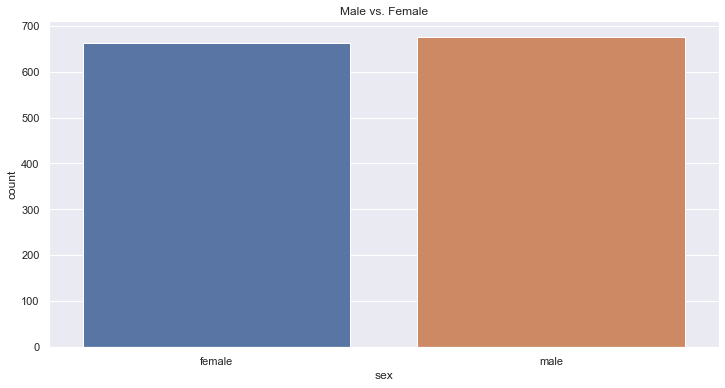

In [193]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='sex')
plt.title('Male vs. Female')
plt.show()

From here we can see that the female and male clients are almost evenly distributed, but for the sake of numerical figure, I will count how many each sex is to gain more insight from this bar plot.

In [194]:
df.groupby("sex")["sex"].count()

sex
female    662
male      676
Name: sex, dtype: int64

From this output, we can see that there are 676 male clients and 662 female clients which means the company doesn't have a large discrepancy in terms of gender distribution. From this we can move on to the age group.

## AGE

In this section we want to see how the overall age distribution and age distribution of each sex are by using box plot.

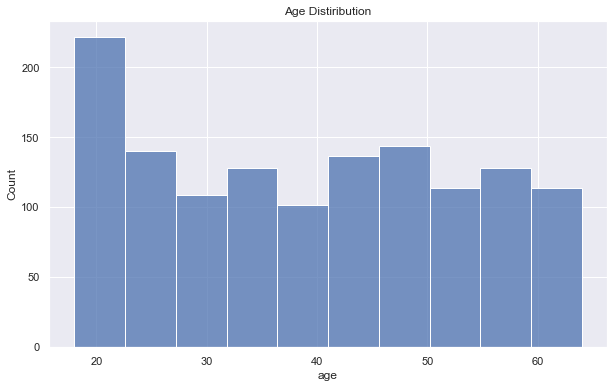

In [195]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=10)
plt.title('Age Distiribution')
plt.show()

From this figure we can see that the insurance company has clients in their early twenties the most. Let's further see how this age distribution applies with the gender group. 

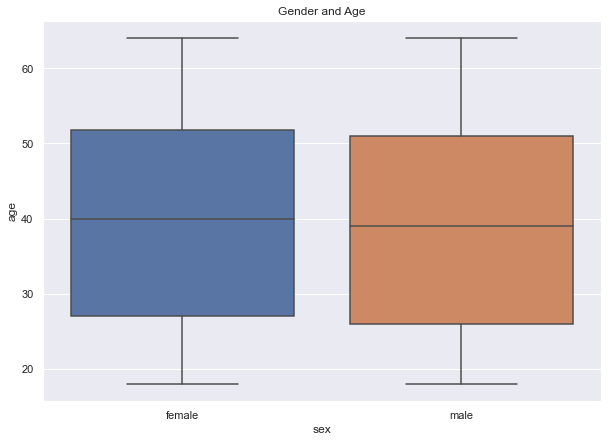

In [196]:
plt.figure(figsize=(10,7))
sns.boxplot(x='sex',y='age',data=df)
plt.title('Gender and Age')
plt.show()

By using the box plot, we can see that the female and male age distribution is overall the same, with the distribution of male age is slightly larger than the female. While it is true that clients in their early 20s have the most count from the previous box plot, but, in this box plot we can see how both gender have a larger distribution between the late 20s and late 30s. 

In [197]:
df.groupby("region")["region"].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

## Regions Distribution

Since the insurance company are located in 4 regions, let's see how many clients each region the insurance company handle by using percentile in a pie chart.

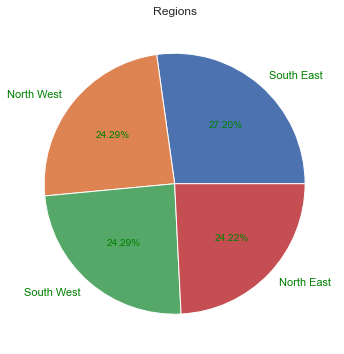

In [198]:
type_value_count = df['region'].value_counts(normalize=True)*100
plt.figure(figsize=(10,6))
plt.pie(type_value_count,labels=['South East','North West','South West','North East'],autopct='%1.2f%%', textprops={'color':"green"})
plt.title('Regions')
plt.show()

From this pie chart we can see that the clients are also evenly distributed in general, with a slight difference in the South East region where 27% of the clients are of located.

Next, we will be looking at the number of children the clients have and then group them by age and sex to gain more insight of the client distribution. 

## Number of Children 

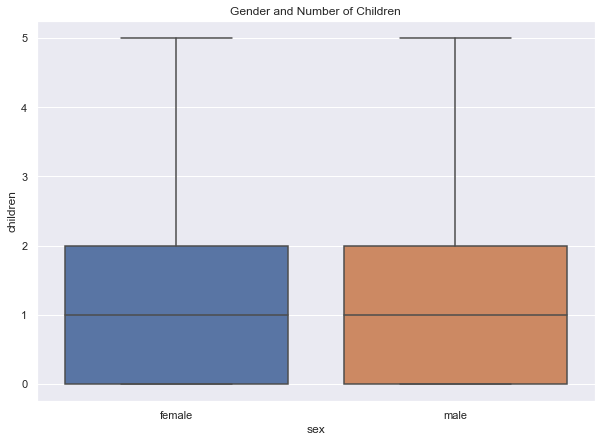

In [200]:
plt.figure(figsize=(10,7))
sns.boxplot(x='sex',y='children',data=df)
plt.title('Gender and Number of Children')
plt.show()

From this boxplot we can see that most of the clients fall between 0-2 number of children where as the maximum number of children is 5. 

## BMI and Smoker Status

Next, we will see how BMI (Body Mass Index) which indicates the body fat based on height and weight are related to smoking, age and gender. Higher than 24.9 BMI indicates how overweighted someone is, let's see how this distributes among the insurance company's clients. 

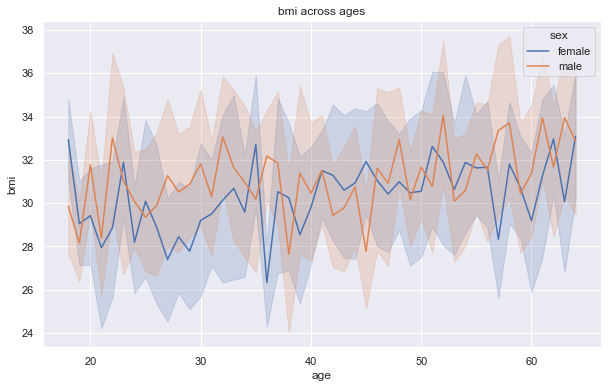

In [201]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age',y='bmi',data=df,hue='sex')
plt.title('bmi across ages')
plt.show()

From this line chart we can see that female and male BMI have quite the discrepancy especially in the middle-late 20s and late 30s. We can also see that the onder someone gets, the higher the BMI gets, this greatly shows in the male group. Let's see further how the smoker status affects the BMI.

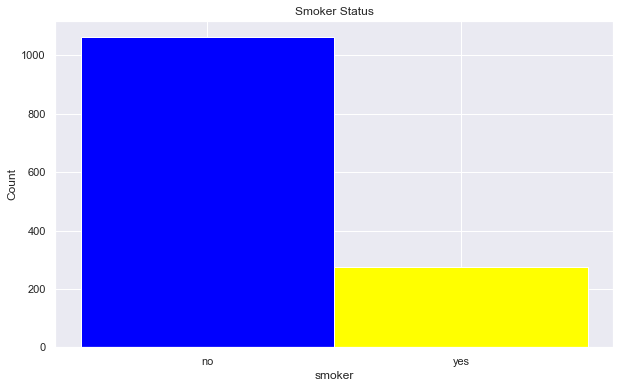

In [202]:
plt.figure(figsize=(10,6))
ax = sns.histplot(df['smoker'],bins=10, color="red")
ax.patches[0].set_facecolor("blue")
ax.patches[1].set_facecolor("yellow")
plt.title('Smoker Status')
plt.show()

We can see that the amount of non-smokers are greater than the smokers. Let's further see how the BMI and smoker status play out since the two of them are closely related to body fat.

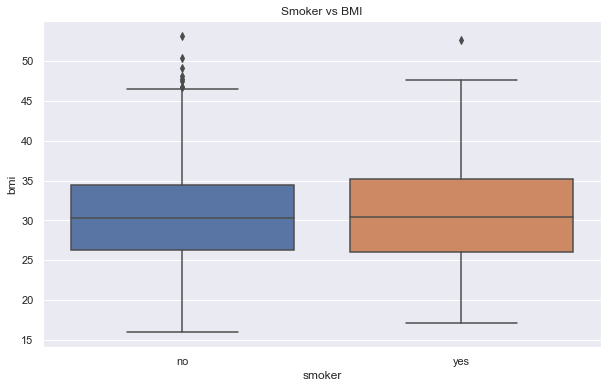

In [203]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker',y='bmi',data=df)
plt.title('Smoker vs BMI')
plt.show()

From this box plot, we can see although the smokers have higher BMI, it doesn't change the fact that the non-smokers also have high BMI and how there are much more outliers in the non-smoker group. Since there are outliers in the BMI, I will then treat the outliers. 

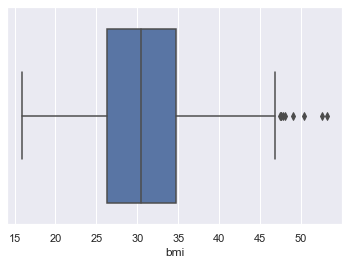

In [204]:
ax = sns.boxplot(x=df["bmi"])

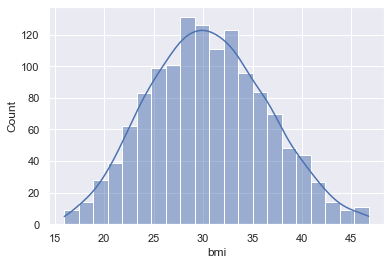

In [220]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="bmi",kde=True)
plt.show()

To exterminate the outliers in the BMI, I will use the extreme value analysis of IQR (Interquartile Range).

In [206]:
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
IQR = Q3-Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

From this code, we then create a new variable that will be the new BMI data without the outliers. 

In [207]:
df = df[(df['bmi']>lower_bound) & (df['bmi']<upper_bound)]
df

,age,sex,bmi,children,smoker,region,charges
0,18,female,26.315,0,no,northeast,2198.18985
1,18,female,38.665,2,no,northeast,3393.35635
2,18,female,35.625,0,no,northeast,2211.13075
3,18,female,30.115,0,no,northeast,21344.84670
4,18,female,36.850,0,yes,southeast,36149.48350
...,...,...,...,...,...,...,...
1333,64,male,38.190,0,no,northeast,14410.93210
1334,64,male,37.905,0,no,northwest,14210.53595
1335,64,male,26.410,0,no,northeast,14394.55790
1336,64,male,36.960,2,yes,southeast,49577.66240


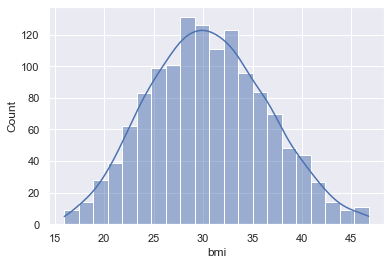

In [221]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="bmi",kde=True)

plt.show()

Now, the BMI distribution is normal.

## HOSPITALIZATION CHARGES

After analyzing the factors/metrics, we will further analyze the hospitalization charges of the clients with the factors given. First, I will use central tendency to gain insight from the hospitalization charges. 

In [209]:
print ('Min: ' + str(df['charges'].min()))
print ('Mode: ' + str(df['charges'].mode()[0]))
print ('Median: ' + str(df['charges'].median()))
print ('Mean: ' + str(df['charges'].mean()))
print ('Max: ' + str(df['charges'].max()))

Min: 1121.8739
Mode: 1639.5631
Median: 9361.3268
Mean: 13212.333374378491
Max: 62592.87309


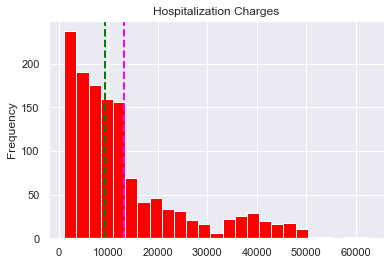

In [210]:
%matplotlib inline

Charges = df['charges']
Charges.plot.hist(title='Hospitalization Charges', color='red', bins=25)  
plt.axvline(Charges.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Charges.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

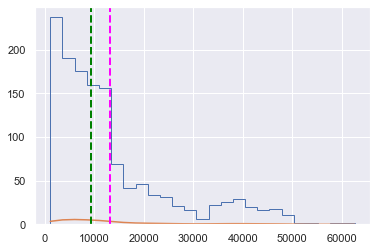

In [211]:
%matplotlib inline


charges = df['charges']
density = stats.gaussian_kde(charges)
n, x, _ = plt.hist(charges, histtype='step', bins=25)  
plt.plot(x, density(x)*10**5)
plt.axvline(charges.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(charges.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

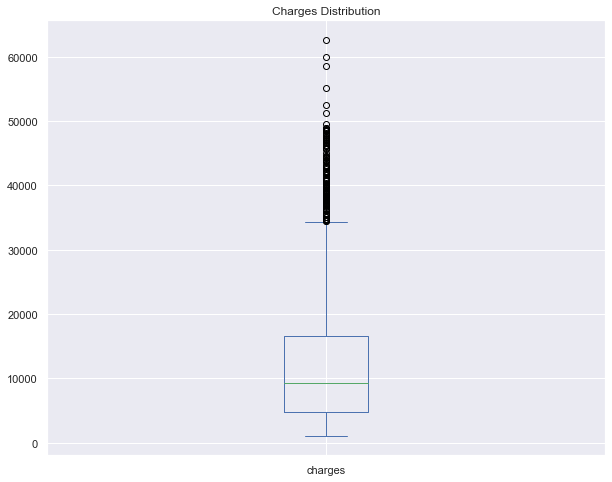

In [166]:
%matplotlib inline

df['charges'].plot(kind='box', title='Charges Distribution', figsize=(10,8))
plt.show()


As we can see from the figure, the data for hospitalization is highly skewed. The mean differs from the median, which means there are a lot of outliers that I will handle next.  

In [212]:
Q3 = df['charges'].quantile(0.75)
Q1 = df['charges'].quantile(0.25)
IQR = Q3-Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

upper_bound

34358.841975

In [215]:
df1 = df[(df['charges']>lower_bound) & (df['charges']<upper_bound)]
df1

#this is the dataframe without any outliers whether in BMI and in Charges

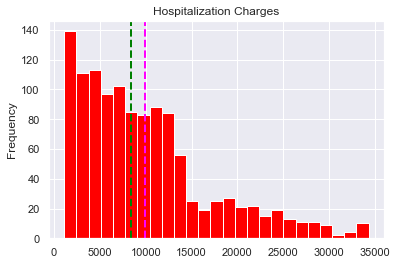

In [170]:
%matplotlib inline

Charges1 = df1['charges']
Charges1.plot.hist(title='Hospitalization Charges', color='red', bins=25)  
plt.axvline(Charges1.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Charges1.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Notice how the data is still skewed even though I have already used IQR, to further normalize the distribution, I will use natural logarithm since it's a function in statistics that deals with skewed data.

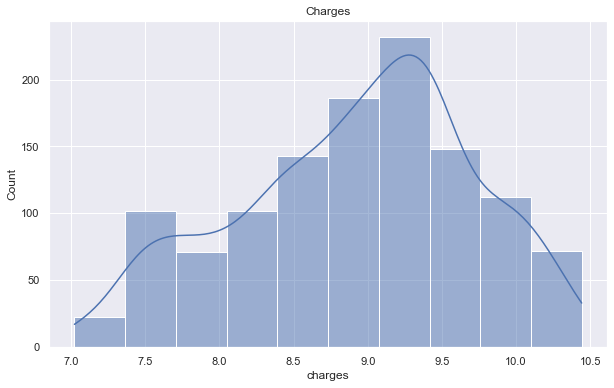

In [224]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(df1['charges']),kde=True,bins=10)
plt.title('Charges')
plt.show()

In [225]:
df1['charges'] = df1['charges'].apply(np.log)

C:\Users\DELL\AppData\Local\Temp/ipykernel_14584/4013861644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['charges'] = df1['charges'].apply(np.log)


In [227]:
df1.to_csv("ins.csv")

## Charges compared to number of children

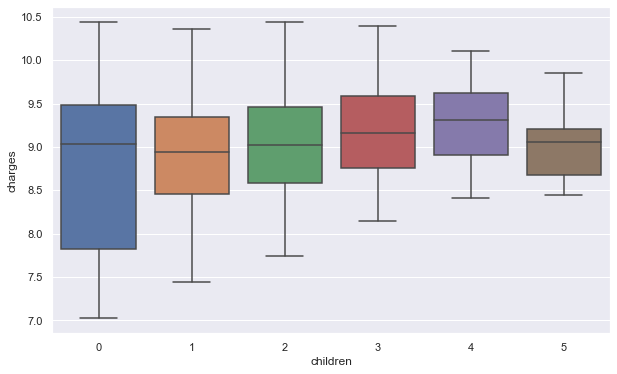

In [174]:
plt.figure(figsize=(10,6))
sns.boxplot(x='children',y='charges',data=df1)
plt.show()

From these box plots we can see how no matter the number of children the clients have, the charges for hospitalization is generally in the same range. The ones with 0-2 children still have high hospital charges.

Furthermore, let's create a heatmap for each of the factors in par with the charges

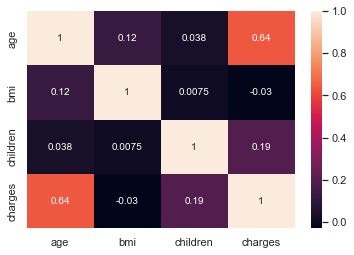

In [175]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

From this heatmap we can see that almost every factors doesn't correlate with the charges other than age. Let's analyze the age group and its relation with charges

## Charges Compared to Age and Sex

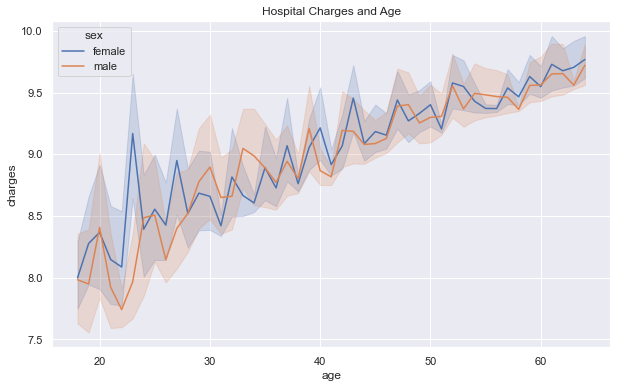

In [176]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age',y='charges',data=df1,hue='sex')
plt.title('Hospital Charges and Age')
plt.show()

From this line chart we can see that both female and male clients, as they get older, the hospital charges also increase. We also see spikes in certain ages (mid-20s) for female, in my assumption these are due to childbirth. After around middle to late 40s the hospital charges for both gender do not show any significant differences. 

Furthermore, let's see how the smoker in par with hospital charges

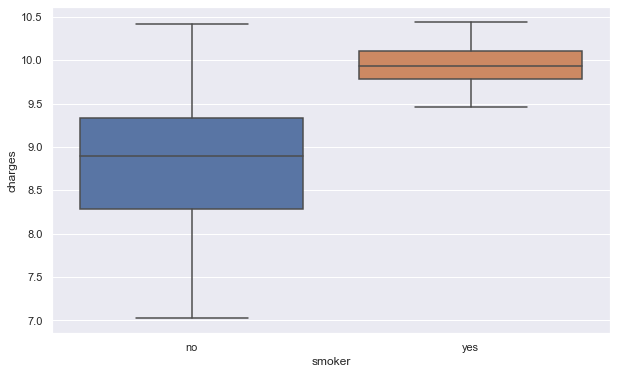

In [177]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker',y='charges',data=df1)
plt.show()

## Charges Compared to Ages and Smoking Status

To further see how the smoker status across ages and how they both correspond with the hospital charges, I will create a line plot.

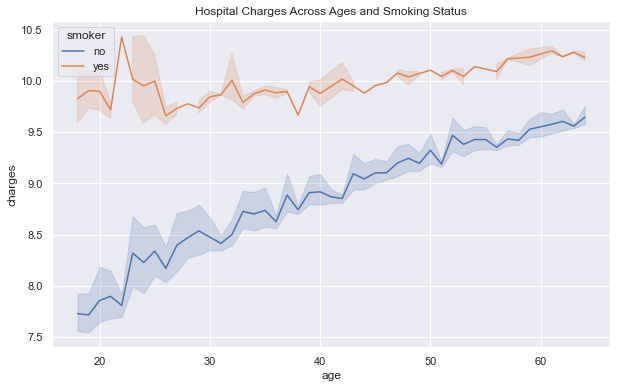

In [228]:
plt.figure(figsize=(10,6))
sns.lineplot(x='age',y='charges',data=df1,hue='smoker')
plt.title('Hospital Charges Across Ages and Smoking Status')
plt.show()

Unsurprisingly, the hospital charges for smokers are significantly higher than non-smokers. Let's further test this assumption in the next section, hypothesis testing.

# HYPOTHESIS TESTING

## Charges and Smokers 

For this section, let's first define the hypothesis for the correlation between hospital charges and the status of smokers.

`H0 : Hospital charges are the same for both smokers and non-smokers`

`H1 : Hospital charges are higher for smokers`

Fort his case I will use the T-test

Counting the P-value = 

In [180]:
smokers = df1[df1['smoker']=='yes']['charges']
non_smokers = df1[df1['smoker']=='no']['charges']
stat,p = stats.ttest_ind(smokers,non_smokers)
print('P-value :',(p/2))

P-value : 1.6369950872651674e-67


From this p-value output, we can see that we reject the Null Hypothesis and that the hospital charges are higher for smokers.

# CONCLUSIONS AND RECOMMENDATIONS

The insurance agency wants to reduce the cost of hospital charges coverage and I found that there are 2 main factors why the charges is higher.

1. Due to older age.

Since this is natural occurance that when someone gets older, so do the organs and it could increase the hospital charges due to the chances of getting more illness. 

2. Due to smoking.

This proves that the ones who has higher hospital charges are smokers, no matter the ages.

I have also found that the southeast region have higher hospital charges, but this doesn't apply to number of children someone has. Regarding number of children, there are significant increasing in hospital charges among female clients in their middle to late 20s, this might be due to childbirth and other relations to it. 

From this findings I recommed to the company that in the future:
1. While assessing the applications for joining clients, the team must take full consideration of their smoking status. Offering those who smoke a rehabilitation might be a sustainable way, but for the instant outlook, I recommend the team to impose higher charge policy with the justification of higher hospital charges in these clients later years.

2. Constraint the age group of applicants. The age group where the hospital charges increase exponentially is in their late 40s. I consider the age of early 40s to be the last age group that can make applications of joining this insurance company.